## Security analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../csv_outputs/master_security.csv")

df.columns

Index(['token_address', 'chain', 'token_name', 'howmany_suspicious_urls',
       'howmany_suspicious_addresses', 'howmany_warnings', 'error'],
      dtype='object')

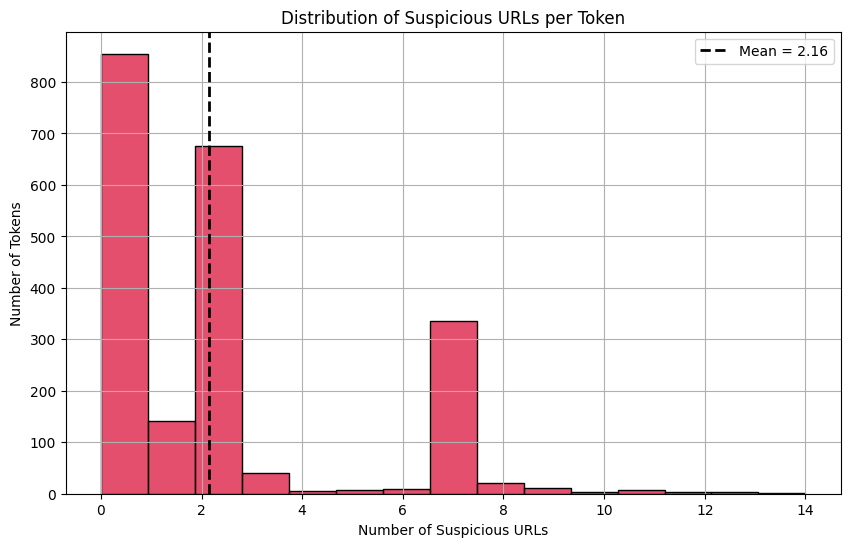

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df['howmany_suspicious_urls'], bins=15, kde=False, color='crimson')
mean_urls = df['howmany_suspicious_urls'].mean()
plt.axvline(mean_urls, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_urls:.2f}')
plt.title('Distribution of Suspicious URLs per Token')
plt.xlabel('Number of Suspicious URLs')
plt.ylabel('Number of Tokens')
plt.legend()
plt.grid(True)
plt.show()

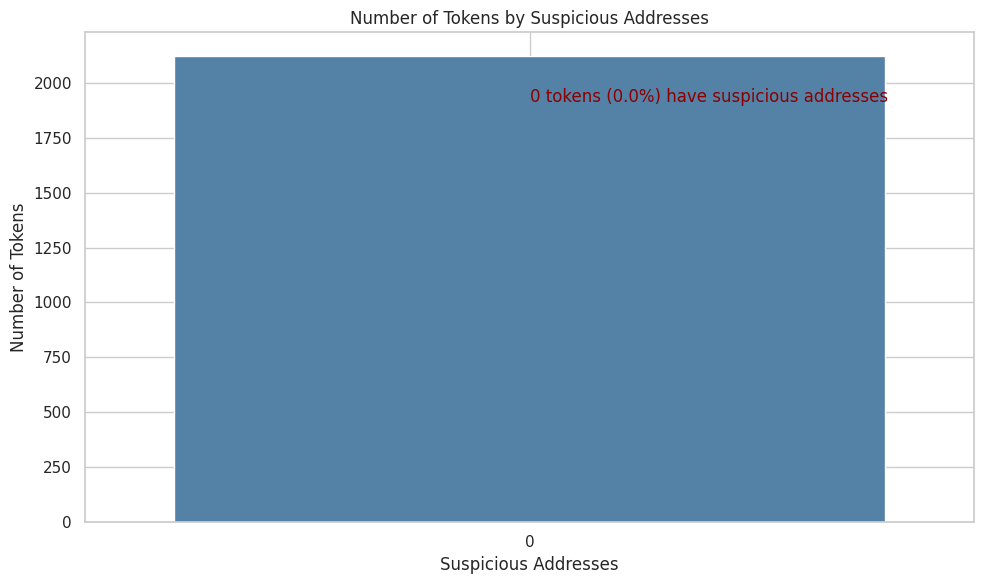

In [3]:
sns.set_theme(style='whitegrid')

# Ensure binary flag
df['has_suspicious_addresses'] = df['howmany_suspicious_addresses'] > 0

# Count exact occurrences
count_data = df['howmany_suspicious_addresses'].value_counts().sort_index()

# Count binary presence
num_with = df['has_suspicious_addresses'].sum()
num_total = df.shape[0]
percent_with = (num_with / num_total) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=count_data.index, y=count_data.values, color='steelblue')

# Add binary summary annotation
plt.title('Number of Tokens by Suspicious Addresses')
plt.xlabel('Suspicious Addresses')
plt.ylabel('Number of Tokens')
plt.grid(True)

# Optional: Annotate total with suspicious addresses
plt.text(
    x=max(count_data.index) * 0.6,
    y=max(count_data.values) * 0.9,
    s=f"{num_with} tokens ({percent_with:.1f}%) have suspicious addresses",
    fontsize=12,
    color='darkred'
)

plt.tight_layout()
plt.show()

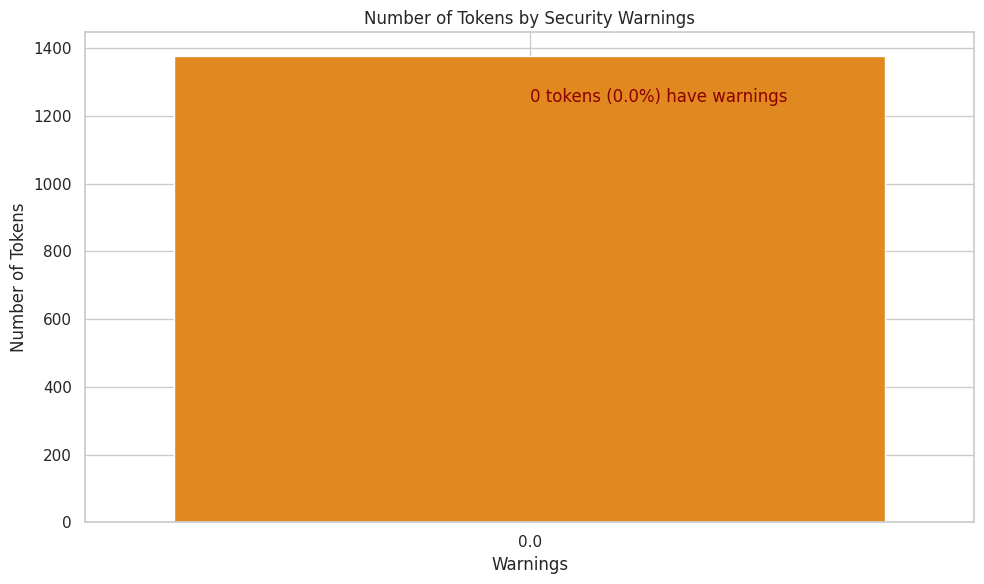

In [4]:
# Ensure binary flag
df['has_warnings'] = df['howmany_warnings'] > 0

# Count exact occurrences
warning_counts = df['howmany_warnings'].value_counts().sort_index()

# Count binary presence
num_with_warnings = df['has_warnings'].sum()
num_total_warnings = df.shape[0]
percent_with_warnings = (num_with_warnings / num_total_warnings) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=warning_counts.index, y=warning_counts.values, color='darkorange')

# Add binary summary annotation
plt.title('Number of Tokens by Security Warnings')
plt.xlabel('Warnings')
plt.ylabel('Number of Tokens')
plt.grid(True)

# Annotate how many have at least one warning
plt.text(
    x=max(warning_counts.index) * 0.6,
    y=max(warning_counts.values) * 0.9,
    s=f"{num_with_warnings} tokens ({percent_with_warnings:.1f}%) have warnings",
    fontsize=12,
    color='darkred'
)

plt.tight_layout()
plt.show()
